

The goal is to discover K latent features

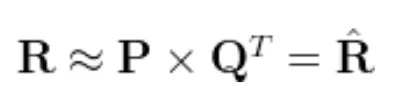

Matrix P represents the association between a user and the features while matrix Q represents the association between an item and the features

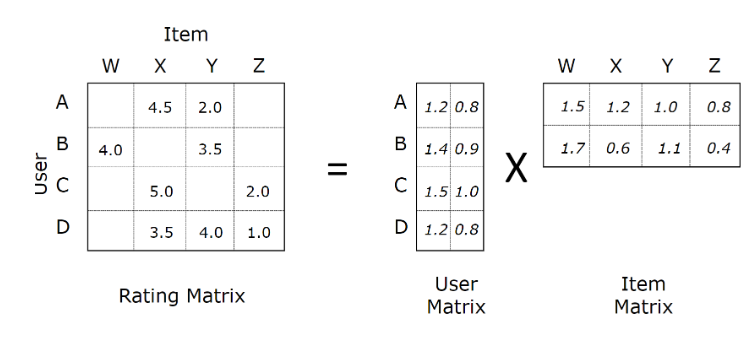

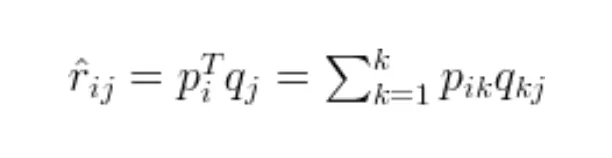

Next, we minimize the difference through the iterations. The method is called gradient descent, aiming at finding a local minimum of the difference.

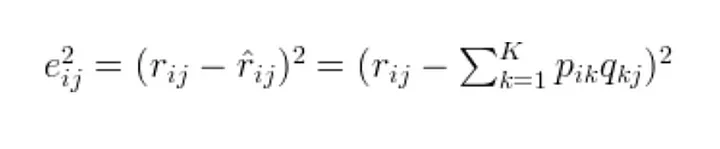

To minimize the error, the gradient is able to minimize the error, and therefore we differentiate the above equation with respect to these two variables separately.

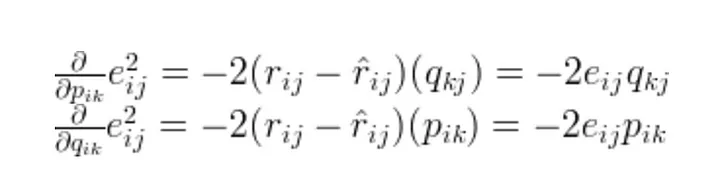

From the gradient, the mathematic formula can be updated for both p_ik and q_kj. a is the step to reach the minimum while the gradient is calculated, and a is usually set with a small value.

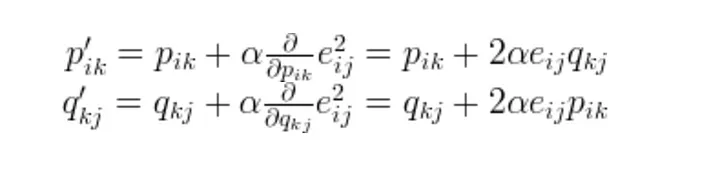

Matrix R is usually very sparse due to the presence of a large amount of both users and items. 

The dimension k is a hyperparameter of the factorization model representing the length used to embed both users and items into real vectors. 

That is, each user and item is represented by a real vector of length k, called the embedding, and a dot product of a user embedding and an item embedding represents the interaction result of the given user-item pair.


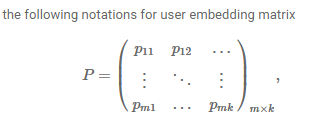




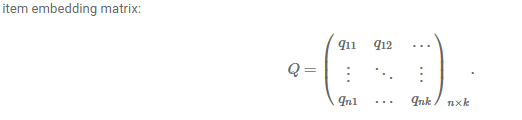

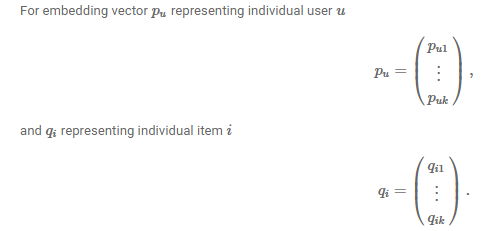

In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

    return P, Q.T

# create as sample sparse Rating matrix

In [2]:
R = [

     [5,3,0,1],

     [4,0,0,1],

     [1,1,0,5],

     [1,0,0,4],

     [0,1,5,4],
    
     [2,1,3,0],

    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3

 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

# generate the reconstructed matrix with filled sparse values

In [3]:
import pandas as pd

R_ = pd.DataFrame(numpy.dot(nP,nQ.T))
R_

,0,1,2,3
0,4.986618,2.954675,4.661664,0.998074
1,3.973915,2.034567,3.839877,0.996421
2,1.031285,0.924926,4.519118,4.962544
3,0.990396,0.275160,3.705367,3.973872
4,2.498498,1.126595,4.925410,4.024416
5,1.975146,0.943908,3.037781,2.023139


# this helps when grouping similar users during recommendation of books,movies,etc based on ratings which are now filled.